# Figure 4a: Plot Area Changes of Historical and Future Hypertropical Regions

This notebook compares the spatial extent of hypertropical regions between historical and future projections across multiple climate models.

**Requirements**:
- Python (3.7+)
- `numpy`, `matplotlib`, `xarray`, `rioxarray`

**Instructions**:
- Update `historical_files` and `future_files` with the correct paths to your binary mask datasets.
- Ensure all masks are binary (1: included in hypertropics, 0: excluded) and have spatial dimensions in projected units (e.g., meters).


## 1. Import all the historical and future CMIP6 datasets

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm
import xarray as xr
import rioxarray

In [7]:
models_sources = [
    ('MIROC', 'MIROC-ES2L'),
    ('BCC', 'BCC-CSM2-MR'),
    ('NOAA-GFDL', 'GFDL-ESM4'),
    ('MRI', 'MRI-ESM2-0'),
    ('NCC', 'NorCPM1'),
    ('MPI-M', 'MPI-ESM1-2-HR'),
    ('CAMS', 'CAMS-CSM1-0'),
    ('NASA-GISS', 'GISS-E2-1-G'),
    ('NCAR', 'CESM2-WACCM'),
    ('CNRM-CERFACS', 'CNRM-CM6-1')]

In [8]:
base_path = '/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/Figure4_CMIP6_datasets/'
biome_filepath = '/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/biome/biomes_data.py'
tas_data_list = []
pr_data_list = []

In [9]:
# Looping from model 0 to 9
for i in range(10):
    # Retrieve model short and full names from models_sources
    model_short, model_full = models_sources[i]
    print(model_short)

    # Construct the file paths
    tas_data= xr.open_dataset(f'{base_path}historical/tas/historical_tas_monthly_1960_1979_{model_short}_{model_full}.nc')
    pr_data = xr.open_dataset(f'{base_path}historical/pr/historical_pr_monthly_1960_1979_{model_short}_{model_full}.nc')
    mask_data = xr.open_dataset(f'{base_path}sftlf/sftlf_{model_short}_{model_full}.nc')
    
    # Create land mask (considering land points where land fraction is greater than 0%
    landmask = mask_data['sftlf'] > 0
    
    # Apply the land mask to the temperature and precipitation data and convert the unit
    tas_data_land = tas_data["tas"].mean(dim = "time").where(landmask, drop=True) 
    pr_data_land = pr_data["pr"].mean(dim = "time").where(landmask, drop=True)

    # Append the land-specific data to respective lists
    tas_data_list.append(tas_data_land)
    pr_data_list.append(pr_data_land)


MIROC
BCC
NOAA-GFDL
MRI
NCC
MPI-M
CAMS
NASA-GISS
NCAR
CNRM-CERFACS


In [10]:
# Load the biome data from the provided Python file
biome_filepath = '/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/biome/biomes_data.py'
import sys

# List all the variable names defined in the uploaded Python file
with open(biome_filepath, 'r') as file:
    exec(file.read())

# Get the names of all variables defined in the file
import inspect
# Get the names of all variables defined in the file
defined_vars = [item[0] for item in inspect.getmembers(sys.modules['__main__']) if not item[0].startswith('_')]

In [11]:
models_sources_f = [
    ('MIROC', 'MIROC-ES2L'),
    ('BCC', 'BCC-CSM2-MR'),
    ('NOAA-GFDL', 'GFDL-ESM4'),
    ('MRI', 'MRI-ESM2-0'),
    ('NCC', 'NorESM2-LM'), #different from historical model
#     ('MPI-M', 'MPI-ESM1-2-HR'), #different from historical model
    ('MPI-M', 'MPI-ESM1-2-LR'), #different from historical model
    ('CAMS', 'CAMS-CSM1-0'),
    ('NASA-GISS', 'GISS-E2-1-G'),
    ('NCAR', 'CESM2-WACCM'),
    ('CNRM-CERFACS', 'CNRM-CM6-1')]

In [12]:
# Future
base_path = '/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/Figure4_CMIP6_datasets/'
biome_filepath = '/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/biome/biomes_data.py'
tas_data_list_f = []
pr_data_list_f = []

In [13]:
# Looping from model 0 to 9
for i in range(10):
    # Retrieve model short and full names from models_sources
    model_short, model_full = models_sources_f[i]
    print(model_short)

    # Construct file paths for temperature, precipitation, and mask data
    tas_data = xr.open_dataset(f'{base_path}ssp585/tas/ssp585_tas_monthly_2080_2099_{model_short}_{model_full}.nc')
    pr_data = xr.open_dataset(f'{base_path}ssp585/pr/ssp585_pr_monthly_2080_2099_{model_short}_{model_full}.nc')
    mask_data = xr.open_dataset(f'{base_path}sftlf/sftlf_{model_short}_{model_full}.nc')

    # Create land mask (considering land points where land fraction is greater than 50%)
    landmask = mask_data['sftlf'] > 0

    # Apply the land mask to the temperature and precipitation data
    tas_data_land = tas_data["tas"].mean(dim = "time").where(landmask, drop=True)
    pr_data_land = pr_data["pr"].mean(dim = "time").where(landmask, drop=True)

    # Append the land-specific data to respective lists
    tas_data_list_f.append(tas_data_land)
    pr_data_list_f.append(pr_data_land)


MIROC
BCC
NOAA-GFDL
MRI
NCC
MPI-M
CAMS
NASA-GISS
NCAR
CNRM-CERFACS


## 2. Plot the area change contour figure

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.ticker as ticker

def plot_area_change_contour(tas_data_list_h, pr_data_list_h, tas_data_list_f, pr_data_list_f, nlines, temps, precips, temps_array, precips_array):
    R = 6371000  # Earth's radius in meters
    
    # Define colors from the figure as closely as possible
    colors = [
    '#1207A3',  # Blue
    '#8F88D2',  # Lighter blue
    '#A4C3D2',  # Even lighter blue
    '#BFD4DB',  # Lightest blue
    '#DDF0F7',  # Almost white
    '#FFFAF4',
    '#FFEFDD',  # light light pink
    '#FFD2C1',  # Lightest pink
    '#FFB5A6',  # Even lighter pink
    '#DB7A7B',  # Lighter pink
    '#BB0103'   # Pink (Deep pink)
    ]

    # Create a custom colormap with the defined gradient
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    # Define the levels of the contours based on your provided bounds
    bounds = [-1e7, -2e6, -1e6, -1e5, -1e4, -1e3, 0, 1e3, 1e4, 1e5, 1e6, 2e6, 1e7]

    # Use BoundaryNorm to map the bounds to the colormap
    norm = BoundaryNorm(bounds, cmap.N)

    
    # Accumulate differences and plot contour
    accumulated_diff = None
    
    # Function to prepare data
    def prepare_data(tas_data, pr_data):
        lat_bounds = np.radians(np.linspace(-90, 90, len(pr_data['lat']) + 1))
        dlat = np.sin(lat_bounds[1:]) - np.sin(lat_bounds[:-1])
        dlon = np.radians(2.8125)  # Assuming a fixed difference in longitude in radians
        areas = R**2 * dlon * dlat
        areas_2d = np.outer(areas, np.ones(pr_data['lon'].shape[0]))

        tas_flat = tas_data.values.flatten()
        pr_flat = pr_data.values.flatten()
        areas_flat = areas_2d.flatten()

        valid_indices = np.isfinite(tas_flat) & np.isfinite(pr_flat)
        tas_flat = tas_flat[valid_indices]
        pr_flat = pr_flat[valid_indices]
        areas_flat = areas_flat[valid_indices]

        pr_flat_mm_year = pr_flat * 86400 * 1000 * 1000 / (1000 * 1000) * 365.25
        tas_flat_celsius = tas_flat - 273.15
        areas_flat_km2 = areas_flat * 1e-6
        
        return tas_flat_celsius, pr_flat_mm_year, areas_flat_km2
    

    # Loop over each model's data
    for tas_data_h, pr_data_h, tas_data_f, pr_data_f in zip(tas_data_list_h, pr_data_list_h, tas_data_list_f, pr_data_list_f):
        # Prepare the data
        
        tas_hist, pr_hist, areas_hist = prepare_data(tas_data_h, pr_data_h)
        tas_future, pr_future, areas_future = prepare_data(tas_data_f, pr_data_f)
        
        # Define bin edges that cover the entire range of temperatures from both datasets
        bins_temp = np.linspace(-30, 40, num=100)  # for example, from -30 to max_temp with 100 bins
        bins_precip = np.linspace(0, 8000, num=100)  # Adjust according to your precipitation data

        # Now when creating histograms, use these bin edges
        hist_hist, xedges_h, yedges_h = np.histogram2d(tas_hist, pr_hist, bins=[bins_temp, bins_precip], weights=areas_hist)
        hist_future, xedges_f, yedges_f = np.histogram2d(tas_future, pr_future, bins=[bins_temp, bins_precip], weights=areas_future)

        # Then subtract future from historical
        hist_diff = hist_future - hist_hist
        
        # After the loop, use the accumulated differences for contour plot
        # Accumulate the differences
        if accumulated_diff is None:
            accumulated_diff = hist_diff
        else:
            accumulated_diff += hist_diff

#     # Mask the arrays where the difference is zero (if needed)
    accumulated_diff_masked = np.ma.masked_where(accumulated_diff == 0, accumulated_diff)
#     accumulated_diff_masked =  accumulated_diff

    # Plotting configuration
    plt.figure(figsize=(10, 6))
    # Create the contour plot using the accumulated differences
    # Capture the contour set as a variable 'cf'
    plt.contourf(bins_temp[:-1], bins_precip[:-1], accumulated_diff_masked.T, cmap=cmap, norm=norm, levels=bounds, extend='both', alpha=0.8)

    
    # Plot lines and arrays for Whittaker plot overlay
    precips_mm = [precip * 10 for precip in precips]
    precips_array_mm = [precip_array * 10 for precip_array in precips_array]
    for i in range(nlines):
        plt.plot(temps[i], precips_mm[i], 'k-', linewidth=1)
    for i in range(len(temps_array)):
        plt.plot(temps_array[i], precips_array_mm[i], 'k-', linewidth=1)
            
            
    # Finalizing the plot
    cbar = plt.colorbar(extend='both')  # Pass the 'cf' mappable to colorbar
    cbar.set_label('Changed Area (km²)', fontsize=20)
    cbar.ax.tick_params(labelsize=15)


    plt.xlabel('Mean Annual Temperature (°C)', fontsize=20)
    plt.ylabel('Annual Precipitation (mm/yr)', fontsize=20)
    plt.xlim(-30, 40)  # max_temp from your data range
    plt.ylim(0, 8000)  
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # Add panel label "a" to the top-left corner
    plt.gca().text(-0.05, 1.1, 'a', transform=plt.gca().transAxes,
               fontsize=16, fontweight='bold', va='top', ha='left')

    plt.tight_layout()
#     plt.savefig("/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/Figures/area_change_contour.pdf", dpi=300)
    plt.show()



        

In [5]:
# Call the function with the appropriate data lists and parameters
plot_area_change_contour(tas_data_list, pr_data_list, tas_data_list_f, pr_data_list_f, nlines, temps, precips, temps_array, precips_array)
        


NameError: name 'tas_data_list' is not defined

## 3. Make the figure following Nature settings

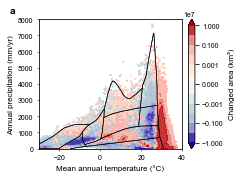

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

def plot_area_change_contour(tas_data_list_h, pr_data_list_h, tas_data_list_f, pr_data_list_f, nlines, temps, precips, temps_array, precips_array):
    R = 6371000  # Earth's radius in meters

    # Define colors from the figure as closely as possible
    colors = [
        '#1207A3', '#8F88D2', '#A4C3D2', '#BFD4DB', '#DDF0F7', '#FFFAF4',
        '#FFEFDD', '#FFD2C1', '#FFB5A6', '#DB7A7B', '#BB0103'
    ]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    bounds = [-1e7, -2e6, -1e6, -1e5, -1e4, -1e3, 0, 1e3, 1e4, 1e5, 1e6, 2e6, 1e7]
    norm = BoundaryNorm(bounds, cmap.N)

    accumulated_diff = None

    def prepare_data(tas_data, pr_data):
        lat_bounds = np.radians(np.linspace(-90, 90, len(pr_data['lat']) + 1))
        dlat = np.sin(lat_bounds[1:]) - np.sin(lat_bounds[:-1])
        dlon = np.radians(2.8125)
        areas = R**2 * dlon * dlat
        areas_2d = np.outer(areas, np.ones(pr_data['lon'].shape[0]))

        tas_flat = tas_data.values.flatten()
        pr_flat = pr_data.values.flatten()
        areas_flat = areas_2d.flatten()

        valid = np.isfinite(tas_flat) & np.isfinite(pr_flat)
        tas_flat = tas_flat[valid] - 273.15
        pr_flat = pr_flat[valid] * 86400 * 1000 * 1000 / 1e6 * 365.25
        areas_flat = areas_flat[valid] * 1e-6

        return tas_flat, pr_flat, areas_flat

    for tas_h, pr_h, tas_f, pr_f in zip(tas_data_list_h, pr_data_list_h, tas_data_list_f, pr_data_list_f):
        tas_hist, pr_hist, area_hist = prepare_data(tas_h, pr_h)
        tas_future, pr_future, area_future = prepare_data(tas_f, pr_f)

        bins_temp = np.linspace(-30, 40, num=100)
        bins_precip = np.linspace(0, 8000, num=100)

        hist_hist, _, _ = np.histogram2d(tas_hist, pr_hist, bins=[bins_temp, bins_precip], weights=area_hist)
        hist_future, _, _ = np.histogram2d(tas_future, pr_future, bins=[bins_temp, bins_precip], weights=area_future)

        diff = hist_future - hist_hist
        accumulated_diff = diff if accumulated_diff is None else accumulated_diff + diff

    # --- Nature figure settings start here ---
    # Set global matplotlib styles for Nature
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': 7,              # Base font size (tick labels)
        'axes.labelsize': 8,         # Axis labels
        'axes.titlesize': 8,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        'pdf.fonttype': 42,          # For vector text compatibility
    })

    # Create plot
    fig = plt.figure(figsize=(3.5, 2.6))  # ~89mm × ~66mm = Nature single-column size
    ax = fig.add_subplot(111)

    masked_diff = np.ma.masked_where(accumulated_diff == 0, accumulated_diff)
    cf = ax.contourf(bins_temp[:-1], bins_precip[:-1], masked_diff.T,
                     cmap=cmap, norm=norm, levels=bounds, extend='both', alpha=0.8)

    precips_mm = [p * 10 for p in precips]
    precips_array_mm = [pa * 10 for pa in precips_array]
    for i in range(nlines):
        ax.plot(temps[i], precips_mm[i], 'k-', linewidth=0.6)
    for i in range(len(temps_array)):
        ax.plot(temps_array[i], precips_array_mm[i], 'k-', linewidth=0.6)

#     # Colorbar
#     cbar = plt.colorbar(cf, ax=ax, extend='both', fraction=0.046, pad=0.04)
#     cbar.set_label('Changed Area (km²)', fontsize=8)
#     cbar.ax.tick_params(labelsize=7)

#     ax.set_xlabel('Mean Annual Temperature (°C)')
#     ax.set_ylabel('Annual Precipitation (mm/yr)')
        # Colorbar
    cbar = plt.colorbar(cf, ax=ax, extend='both', fraction=0.046, pad=0.04)
    cbar.set_label('Changed area (km²)', fontsize=8)  # Sentence case
    cbar.ax.tick_params(labelsize=7)

    # Axis labels
    ax.set_xlabel('Mean annual temperature (°C)')  # Sentence case
    ax.set_ylabel('Annual precipitation (mm/yr)')  # Sentence case

    ax.set_xlim(-30, 40)
    ax.set_ylim(0, 8000)
    ax.tick_params(width=0.5, length=2)

    # Panel label (a)
    ax.text(-0.2, 1.1, 'a', transform=ax.transAxes,
            fontsize=10, fontweight='bold', fontname='Arial', va='top', ha='left')

    plt.tight_layout()
#     plt.savefig("/Users/yanlei/Documents/PhD/postdoc_2A/Jeff_Nature/Figures/Figure4a_Area_change_contour.jpg", dpi=300)
    plt.show()

    # Call the function with the appropriate data lists and parameters
plot_area_change_contour(tas_data_list, pr_data_list, tas_data_list_f, pr_data_list_f, nlines, temps, precips, temps_array, precips_array)
